In [138]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import math
from pprint import pprint
import random
import matplotlib.pyplot as plt  

In [139]:
def Knn_classifier(train,row, k):
    #store {euclid sum , label} 
    my_dist = []
    l = len(row)
    count = 0
    for r in train[:,1:]:
        sum = 0
        for x in range(l):
            sum+=pow(row[x] - r[x],2)
            label = train [count][0]
        count+=1
        sum = math.sqrt(sum)
        my_dist.append((sum,label))
    
    my_dist.sort(key=lambda x: x[0])

    #stores {label , count) 
    predlabel = {}
    for x in range(k):
        res = my_dist[x][1]
        if res not in predlabel:
            predlabel[res] = 1
        predlabel[res] += 1
    ans = sorted(predlabel.items(),reverse = True)
    k = ans[0][0]
    return k


In [140]:
def pfunction():
    global tp,tn,fp,fn
    print("tp :",tp,", tn :",tn,", fp :",fp,", fn :",fn)

    if(tp!=0 and fn!=0):
        rc=tp/(tp+fn)
    else:
        rc = 1
    if(tp!=0 and fp!=0):
        pc=tp/(tp+fp)
    else:
        pc = 1
    f1=2/((1/pc)+(1/rc))
    print("recall :",rc,", precision :",pc,", F1 score :",f1)
    
    return

In [141]:
def find_correct(myans , myvalidate):
    global correct,tp,tn,fp,fn
    a = myvalidate[:][0]

    if (myans == a):
        correct +=1
    if(myans==1 and a==1):
        tp+=1
    if(myans==1 and a==0):
        fp+=1    
    if(myans==0 and a==0):
        tn+=1
    if(myans==0 and a==1):
        fn+=1
        
    return correct

In [142]:
df = pd.read_csv("Robot1", header=None, delimiter=r"\s+")
# validate = pd.read_csv("Robot1", header=None, delimiter=r"\s+")
train,validate = train_test_split(df, test_size = 0.2)
#remove last column from datas as insignificant
train = train.iloc[:, :-1]
validate = validate.iloc[:, :-1]

train1=train
val1=validate

train = train.values
myvalidate = validate.values

validate_arr = validate.iloc[:, 1:].astype(float)
validate_arr = validate_arr.values

acc_list = []
correct = 0
tp,fp,tn,fn=0,0,0,0
max_accuracy = 0
k_for_max_acc = 0
for i in range(1,12) :
    for row in range(len(validate_arr)):
        myans = Knn_classifier(train,validate_arr[row], i)
        corr = find_correct(myans , myvalidate[row]) 
    accu = (corr/float(len(validate_arr)))*100
    acc_list.append(accu)
    if(accu>max_accuracy):
        max_accuracy = accu
        k_for_max_acc = i
    correct = 0
    pfunction()
    
print("\nno of test samples", len(validate_arr))
print("Max_accuracy : ",max_accuracy, "for k :",k_for_max_acc)


tp : 7 , tn : 11 , fp : 3 , fn : 4
recall : 0.6363636363636364 , precision : 0.7 , F1 score : 0.6666666666666666
tp : 16 , tn : 21 , fp : 7 , fn : 6
recall : 0.7272727272727273 , precision : 0.6956521739130435 , F1 score : 0.7111111111111111
tp : 27 , tn : 29 , fp : 13 , fn : 6
recall : 0.8181818181818182 , precision : 0.675 , F1 score : 0.7397260273972603
tp : 38 , tn : 35 , fp : 21 , fn : 6
recall : 0.8636363636363636 , precision : 0.6440677966101694 , F1 score : 0.7378640776699028
tp : 49 , tn : 39 , fp : 31 , fn : 6
recall : 0.8909090909090909 , precision : 0.6125 , F1 score : 0.725925925925926
tp : 60 , tn : 41 , fp : 43 , fn : 6
recall : 0.9090909090909091 , precision : 0.5825242718446602 , F1 score : 0.7100591715976331
tp : 71 , tn : 43 , fp : 55 , fn : 6
recall : 0.922077922077922 , precision : 0.5634920634920635 , F1 score : 0.6995073891625615
tp : 82 , tn : 43 , fp : 69 , fn : 6
recall : 0.9318181818181818 , precision : 0.543046357615894 , F1 score : 0.6861924686192468
tp : 9

Text(0, 0.5, 'Accuracy')

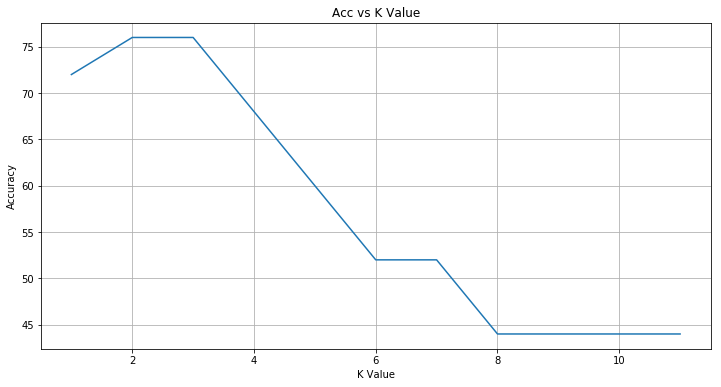

In [143]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 12), acc_list)
plt.title('Acc vs K Value')  
plt.xlabel('K Value')
plt.grid(True)
plt.ylabel('Accuracy') 
        

In [144]:
y_train = train1.pop(0)
x_train = train1
y_test = val1.pop(0)
x_test = val1

from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=15)  
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))




[[14  0]
 [ 1 10]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.91      0.95        11

   micro avg       0.96      0.96      0.96        25
   macro avg       0.97      0.95      0.96        25
weighted avg       0.96      0.96      0.96        25

0.96
